# 200_Analysis_Industry_Growth

## Purpose

This notebook will look at the growth in the gaming indusry over the last thirty years. The results will then be used to see what type of game a company should release to make the most sales.

## Datasets

- Input: Clean_Games_Sales_Total.pkl 
- Output: 200_Analysis_Industry_Growth_Sales.pkl && 200_Analysis_Industry_Growth_Counts.pkl

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt 
import seaborn as sns

%matplotlib inline 

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [4]:
videogames = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
videogames.shape

(16444, 11)

## Overview of datasets

Getting a brief overview of the datasets so we can see what column names are and what data is in them.

In [5]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [6]:
videogames["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
videogames["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Industry Growth Analysis

## Sales

In [8]:
yearly_sales = videogames.groupby('Year_of_Release').sum()
yearly_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


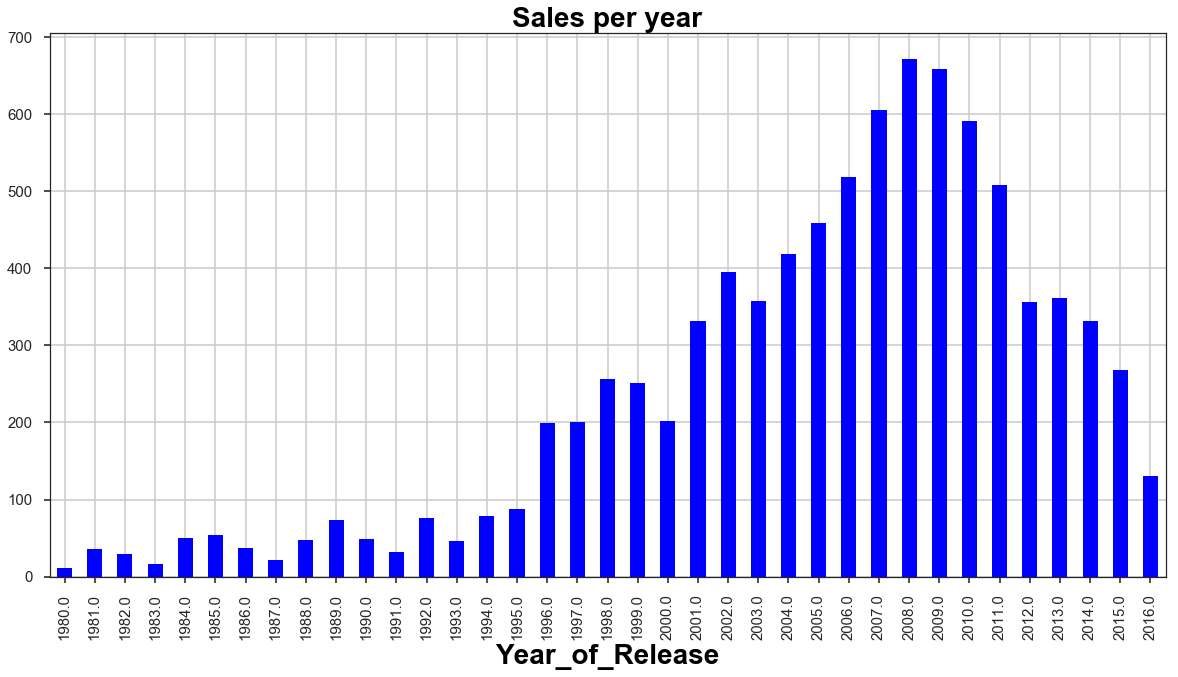

In [9]:
yearly_sales['Global_Sales'].plot(kind='bar', title="Sales per year", color = 'b')

Text(0.5,1,'Yearly game sales per Region')

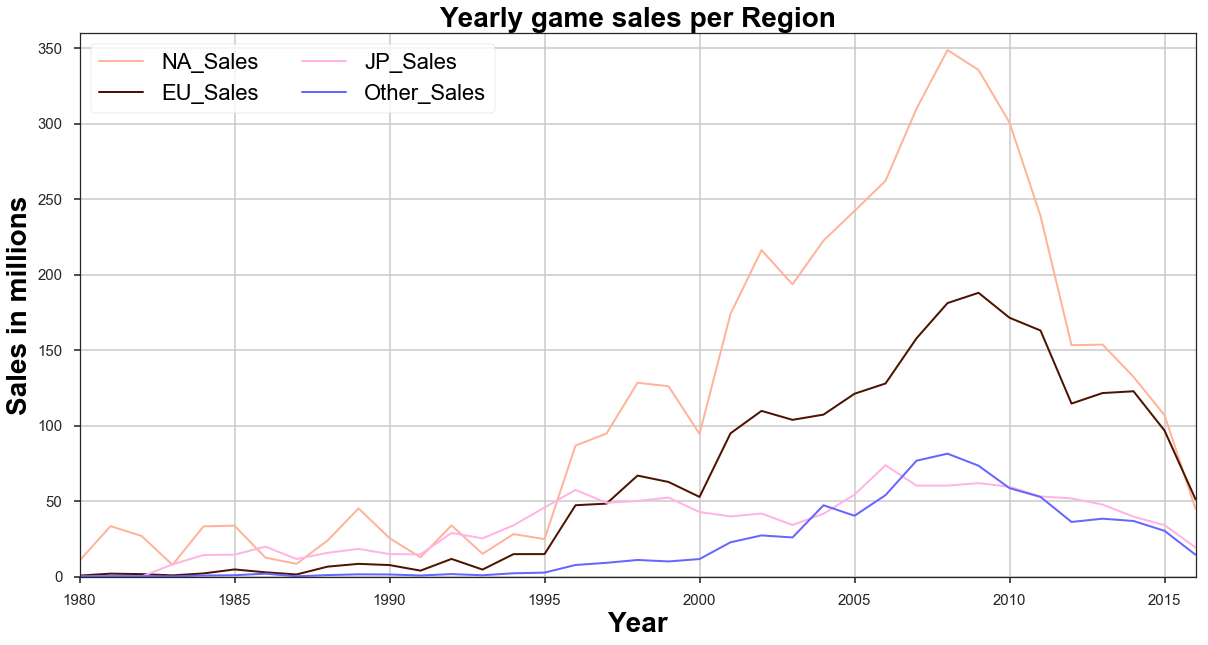

In [10]:
fig, ax = plt.subplots()

ax.plot(yearly_sales['NA_Sales'],color = '#ffb399') 
ax.plot(yearly_sales['EU_Sales'], color = '#4d1300')
ax.plot(yearly_sales['JP_Sales'], color = '#ffb3e6')
ax.plot(yearly_sales['Other_Sales'], color = '#6666ff')
 
ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.set_ylim(0,360)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly game sales per Region')

From above see that 2008 was the best year for sales of videogames. However we see from the second graph that for EU the best year was 2009, and for Japan the best year was 2006.

We can also see that from 1980 until 1995 the market was quite volatile with each year jumping up and down.

In [11]:
action = videogames[videogames['Genre'] == 'Action']
genre = action.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
genre.rename(columns={'Global_Sales': 'Action'}, inplace=True)
genre = genre.set_index('Year_of_Release')

In [12]:
adventure = videogames[videogames['Genre'] == 'Adventure']
tmp = adventure.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Adventure'] = tmp

In [13]:
sports = videogames[videogames['Genre'] == 'Sports']
tmp = sports.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Sports'] = tmp

In [14]:
platform = videogames[videogames['Genre'] == 'Platform']
tmp = platform.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Platform'] = tmp

In [15]:
racing = videogames[videogames['Genre'] == 'Racing']
tmp = racing.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Racing'] = tmp

In [16]:
role_playing = videogames[videogames['Genre'] == 'Role-Playing']
tmp = role_playing.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Role-Playing'] = tmp

In [17]:
puzzle = videogames[videogames['Genre'] == 'Puzzle']
tmp = puzzle.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Puzzle'] = tmp

In [18]:
misc = videogames[videogames['Genre'] == 'Misc']
tmp = misc.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Misc'] = tmp

In [19]:
shooter = videogames[videogames['Genre'] == 'Shooter']
tmp = shooter.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Shooter'] = tmp

In [20]:
simulation = videogames[videogames['Genre'] == 'Simulation']
tmp = simulation.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Simulation'] = tmp

In [21]:
fighting = videogames[videogames['Genre'] == 'Fighting']
tmp = fighting.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Fighting'] = tmp

In [22]:
strategy = videogames[videogames['Genre'] == 'Strategy']
tmp = strategy.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Strategy'] = tmp
genre.head()

,Action,Adventure,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Fighting,Strategy
Year_of_Release,,,,,,,,,,,,
1980.0,0.34,NaN,0.49,NaN,NaN,NaN,NaN,2.71,7.07,NaN,0.77,NaN
1981.0,14.84,NaN,0.79,6.93,0.48,NaN,2.24,NaN,10.04,0.45,NaN,NaN
1982.0,6.52,NaN,1.05,5.03,1.57,NaN,10.03,0.87,3.79,NaN,NaN,NaN
1983.0,2.86,0.4,3.20,6.93,NaN,NaN,0.78,2.14,0.48,NaN,NaN,NaN
1984.0,1.85,NaN,6.18,0.69,5.95,NaN,3.14,1.45,31.10,NaN,NaN,NaN


Text(0.5,1,'Yearly sales per genre')

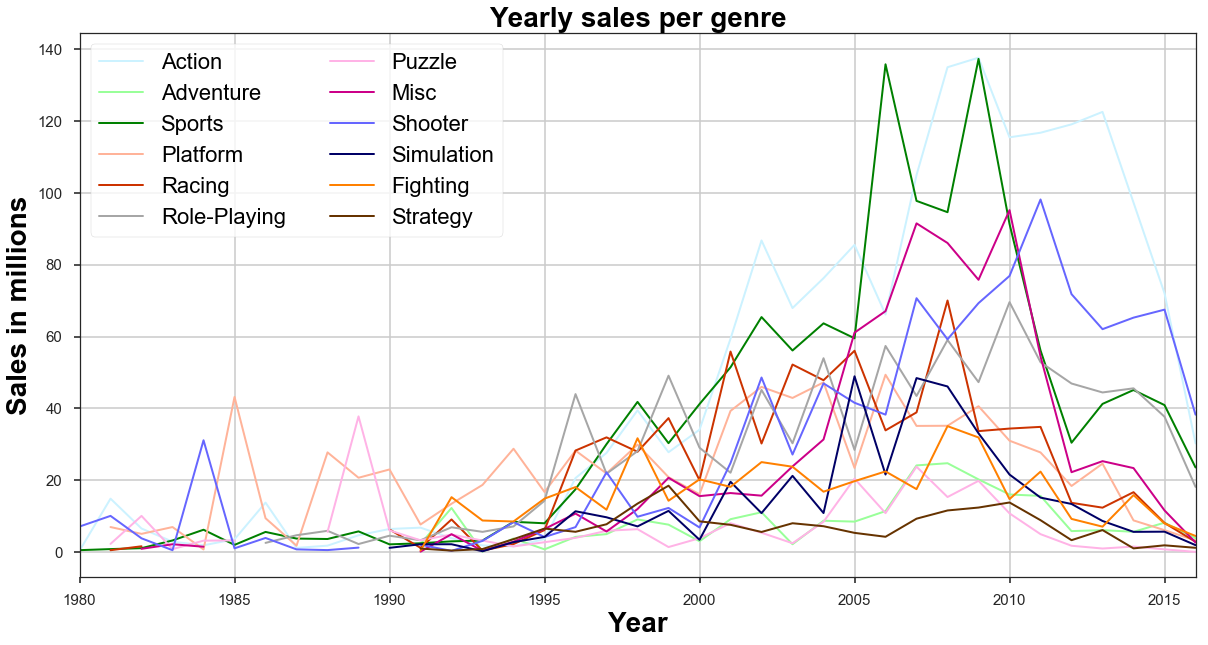

In [23]:
fig, ax = plt.subplots()

ax.plot(genre['Action'], color = '#ccf2ff')
ax.plot(genre['Adventure'],color = '#99ff99')
ax.plot(genre['Sports'], color = '#008000')
ax.plot(genre['Platform'],color = '#ffb399')
ax.plot(genre['Racing'], color = '#cc3300')
ax.plot(genre['Role-Playing'], color = '#a6a6a6')
ax.plot(genre['Puzzle'], color = '#ffb3e6')
ax.plot(genre['Misc'],color = '#cc0088')
ax.plot(genre['Shooter'], color = '#6666ff')
ax.plot(genre['Simulation'],color = '#000066')
ax.plot(genre['Fighting'],color = '#ff8000')
ax.plot(genre['Strategy'], color = '#663300')

ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly sales per genre')

The above graph shows the sales figures for each genre. It is a bit messy but gives a good insight into what to look closely at when answering the research question in the results.

In [24]:
platform_sales = videogames.groupby('Platform')[['Global_Sales']].sum()
platform_sales.head()

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,257.92
DC,15.97
DS,803.44


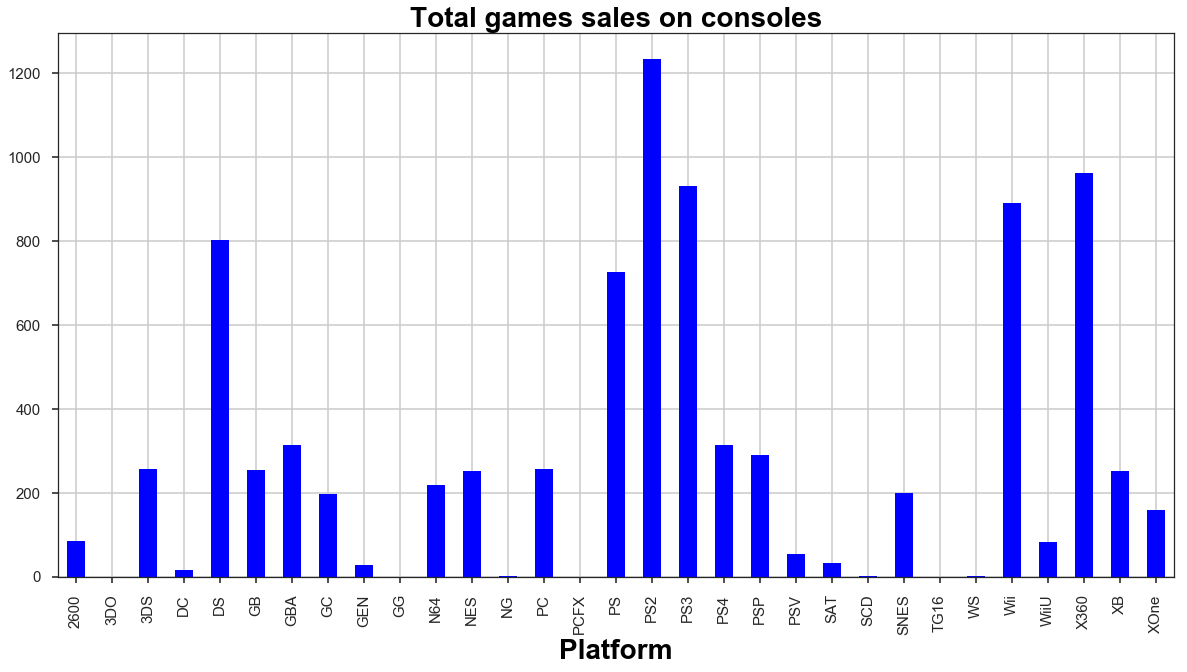

In [25]:
platform_sales['Global_Sales'].plot(kind='bar', title="Total games sales on consoles", color = 'b')

The above shows the total sales of games by each console. We can see that the playsation 2 was the best performing console.

Im also going to get the yearly sales for each console to use in the research question.

In [26]:
console = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console = console.set_index('Year_of_Release')

In [27]:
nes = videogames[videogames['Platform'] == 'NES']
tmp = nes.groupby('Year_of_Release')['Global_Sales'].sum()
console['NES'] = tmp

In [28]:
wii = videogames[videogames['Platform'] == 'Wii']
tmp = wii.groupby('Year_of_Release')['Global_Sales'].sum()
console['Wii'] = tmp

In [29]:
gb = videogames[videogames['Platform'] == 'GB']
tmp = gb.groupby('Year_of_Release')['Global_Sales'].sum()
console['GB'] = tmp

In [30]:
ds = videogames[videogames['Platform'] == 'DS']
tmp = ds.groupby('Year_of_Release')['Global_Sales'].sum()
console['DS'] = tmp

In [31]:
x360 = videogames[videogames['Platform'] == 'X360']
tmp = x360.groupby('Year_of_Release')['Global_Sales'].sum()
console['X360'] = tmp

In [32]:
ps3 = videogames[videogames['Platform'] == 'PS3']
tmp = ps3.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS3'] = tmp

In [33]:
ps2 = videogames[videogames['Platform'] == 'PS2']
tmp = ps2.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS2'] = tmp

In [34]:
snes = videogames[videogames['Platform'] == 'SNES']
tmp = snes.groupby('Year_of_Release')['Global_Sales'].sum()
console['SNES'] = tmp

In [35]:
gba = videogames[videogames['Platform'] == 'GBA']
tmp = gba.groupby('Year_of_Release')['Global_Sales'].sum()
console['GBA'] = tmp

In [36]:
ps4 = videogames[videogames['Platform'] == 'PS4']
tmp = ps4.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS4'] = tmp

In [37]:
tds = videogames[videogames['Platform'] == '3DS']
tmp = tds.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DS'] = tmp

In [38]:
n64 = videogames[videogames['Platform'] == 'N64']
tmp = n64.groupby('Year_of_Release')['Global_Sales'].sum()
console['N64'] = tmp

In [39]:
ps = videogames[videogames['Platform'] == 'PS']
tmp = ps.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS'] = tmp

In [40]:
xb = videogames[videogames['Platform'] == 'XB']
tmp = xb.groupby('Year_of_Release')['Global_Sales'].sum()
console['XB'] = tmp

In [41]:
pc = videogames[videogames['Platform'] == 'PC']
tmp = pc.groupby('Year_of_Release')['Global_Sales'].sum()
console['PC'] = tmp

In [42]:
a2600 = videogames[videogames['Platform'] == '2600']
tmp = a2600.groupby('Year_of_Release')['Global_Sales'].sum()
console['2600'] = tmp

In [43]:
psp = videogames[videogames['Platform'] == 'PSP']
tmp = psp.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSP'] = tmp

In [44]:
xone = videogames[videogames['Platform'] == 'XOne']
tmp = xone.groupby('Year_of_Release')['Global_Sales'].sum()
console['XOne'] = tmp

In [45]:
wiiu = videogames[videogames['Platform'] == 'WiiU']
tmp = wiiu.groupby('Year_of_Release')['Global_Sales'].sum()
console['WiiU'] = tmp

In [46]:
gc = videogames[videogames['Platform'] == 'GC']
tmp = gc.groupby('Year_of_Release')['Global_Sales'].sum()
console['GC'] = tmp

In [47]:
gen = videogames[videogames['Platform'] == 'GEN']
tmp = gen.groupby('Year_of_Release')['Global_Sales'].sum()
console['GEN'] = tmp

In [48]:
dc = videogames[videogames['Platform'] == 'DC']
tmp = dc.groupby('Year_of_Release')['Global_Sales'].sum()
console['DC'] = tmp

In [49]:
psv = videogames[videogames['Platform'] == 'PSV']
tmp = psv.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSV'] = tmp

In [50]:
sat = videogames[videogames['Platform'] == 'SAT']
tmp = sat.groupby('Year_of_Release')['Global_Sales'].sum()
console['SAT'] = tmp

In [51]:
scd = videogames[videogames['Platform'] == 'SCD']
tmp = scd.groupby('Year_of_Release')['Global_Sales'].sum()
console['SCD'] = tmp

In [52]:
ws = videogames[videogames['Platform'] == 'WS']
tmp = ws.groupby('Year_of_Release')['Global_Sales'].sum()
console['WS'] = tmp

In [53]:
ng = videogames[videogames['Platform'] == 'NG']
tmp = ng.groupby('Year_of_Release')['Global_Sales'].sum()
console['NG'] = tmp

In [54]:
tg16 = videogames[videogames['Platform'] == 'TG16']
tmp = tg16.groupby('Year_of_Release')['Global_Sales'].sum()
console['TG16'] = tmp

In [55]:
dO = videogames[videogames['Platform'] == '3DO']
tmp = dO.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DO'] = tmp

In [56]:
gg = videogames[videogames['Platform'] == 'GG']
tmp = gg.groupby('Year_of_Release')['Global_Sales'].sum()
console['GG'] = tmp

In [57]:
pcfx = videogames[videogames['Platform'] == 'PCFX']
tmp = pcfx.groupby('Year_of_Release')['Global_Sales'].sum()
console['PCFX'] = tmp

In [58]:
del console['Global_Sales']

In [59]:
console.head()

,NES,Wii,GB,DS,X360,PS3,PS2,SNES,GBA,PS4,...,DC,PSV,SAT,SCD,WS,NG,TG16,3DO,GG,PCFX
Year_of_Release,,,,,,,,,,,,,,,,,,,,,
1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,50.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Industry counts

Getting counts, on a yearly basis, of the companies in the industry and of the other values, such as amount of genres, which can be counted.

In [60]:
counts = videogames.groupby('Year_of_Release').nunique()
counts = counts.replace(0, np.nan)
counts.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
Year_of_Release,,,,,,,,,,,
1980.0,9,1,1,5,2,9,8,1,4,9,NaN
1981.0,46,1,1,7,14,40,12,1,4,39,NaN
1982.0,36,1,1,7,18,29,10,1,4,31,NaN
1983.0,17,2,1,7,4,15,9,7,3,17,NaN
1984.0,14,2,1,7,4,11,11,13,7,13,NaN


In [61]:
del counts['Year_of_Release']
del counts['NA_Sales']
del counts['EU_Sales']
del counts['JP_Sales']
del counts['Other_Sales']
del counts['Global_Sales']
counts.head()

,Name,Platform,Genre,Publisher,Developer
Year_of_Release,,,,,
1980.0,9,1,5,2,NaN
1981.0,46,1,7,14,NaN
1982.0,36,1,7,18,NaN
1983.0,17,2,7,4,NaN
1984.0,14,2,7,4,NaN


The above can be used in the results to analyse different things against each other over the growth of the industry.

Now we will get the counts for the amount of games for each genre made each year which will also be used in our results notebook. 

In [62]:
action = videogames[videogames['Genre'] == 'Action']
genre_counts = action.groupby('Year_of_Release', as_index = False)['Genre'].count()
genre_counts = genre_counts.set_index('Year_of_Release')
genre_counts.rename(columns={'Genre': 'Action'}, inplace=True)

In [63]:
adventure = videogames[videogames['Genre'] == 'Adventure']
tmp = adventure.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Adventure'] = tmp

In [64]:
fighting = videogames[videogames['Genre'] == 'Fighting']
tmp = fighting.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Fighting'] = tmp

In [65]:
misc = videogames[videogames['Genre'] == 'Misc']
tmp = misc.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Misc'] = tmp

In [66]:
platform = videogames[videogames['Genre'] == 'Platform']
tmp = platform.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['platform'] = tmp

In [67]:
puzzle = videogames[videogames['Genre'] == 'Puzzle']
tmp = puzzle.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Puzzle'] = tmp

In [68]:
racing = videogames[videogames['Genre'] == 'Racing']
tmp = racing.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Racing'] = tmp

In [69]:
roleplaying = videogames[videogames['Genre'] == 'Role-Playing']
tmp = roleplaying.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Role-Playing'] = tmp

In [70]:
shooter = videogames[videogames['Genre'] == 'Shooter']
tmp = shooter.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Shooter'] = tmp

In [71]:
simulation = videogames[videogames['Genre'] == 'Simulation']
tmp = simulation.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Simulation'] = tmp

In [72]:
sports = videogames[videogames['Genre'] == 'Sports']
tmp = sports.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Sports'] = tmp

In [73]:
strategy = videogames[videogames['Genre'] == 'Strategy']
tmp = strategy.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Strategy'] = tmp
genre_counts.head()

,Action,Adventure,Fighting,Misc,platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1980.0,1,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,1,NaN
1981.0,25,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4,NaN
1982.0,18,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2,NaN
1983.0,7,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1,NaN
1984.0,1,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2,NaN


Text(0.5,1,'Yearly releases per genre')

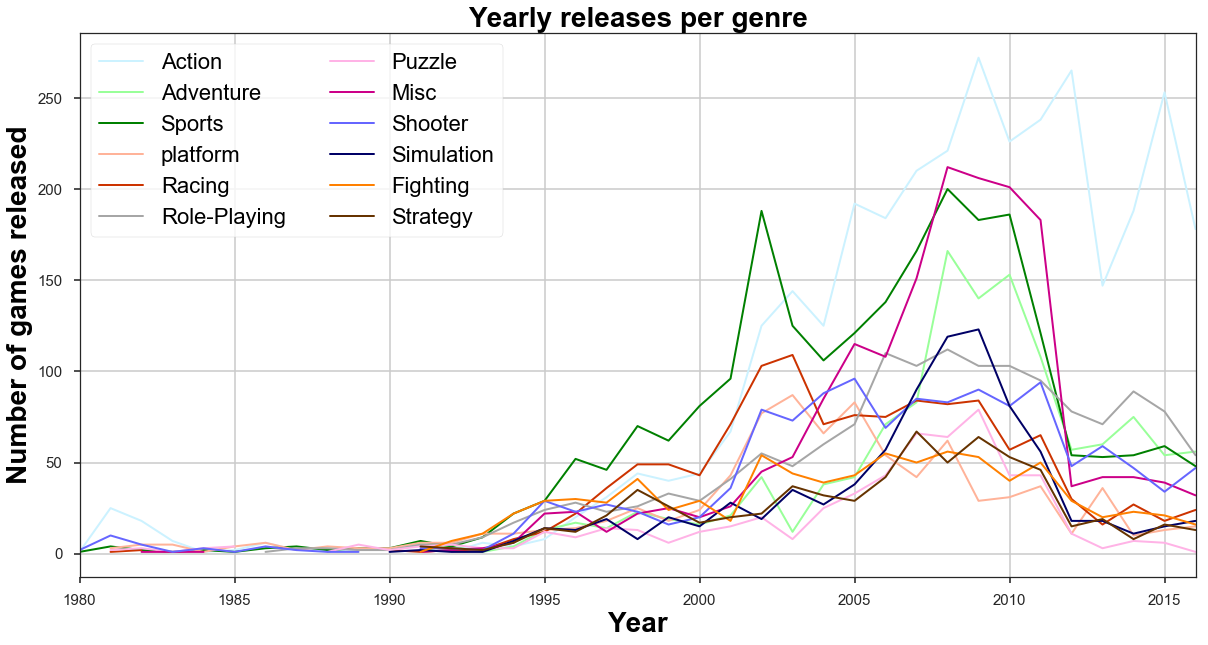

In [74]:
fig, ax = plt.subplots()

ax.plot(genre_counts['Action'], color = '#ccf2ff')
ax.plot(genre_counts['Adventure'],color = '#99ff99')
ax.plot(genre_counts['Sports'], color = '#008000')
ax.plot(genre_counts['platform'],color = '#ffb399')
ax.plot(genre_counts['Racing'], color = '#cc3300')
ax.plot(genre_counts['Role-Playing'], color = '#a6a6a6')
ax.plot(genre_counts['Puzzle'], color = '#ffb3e6')
ax.plot(genre_counts['Misc'],color = '#cc0088')
ax.plot(genre_counts['Shooter'], color = '#6666ff')
ax.plot(genre_counts['Simulation'],color = '#000066')
ax.plot(genre_counts['Fighting'],color = '#ff8000')
ax.plot(genre_counts['Strategy'], color = '#663300')

ax.set_xlabel('Year')
ax.set_ylabel('Number of games released')

ax.set_xlim(1980, 2016)
ax.legend(frameon=True, ncol=2, loc='upper left')
plt.title('Yearly releases per genre')

Like above this graph is a bit rough but it those give us a good insight into what we should use when answering the research question.

## Merging the dataframes

In [75]:
Sales = pd.concat([yearly_sales, genre, console], axis=1)

In [76]:
Counts = pd.concat([counts, genre_counts], axis=1)

## Saving as pickle

In [77]:
Sales.to_pickle("../../data/analysis/200_Industry_Growth_Sales.pkl")
Counts.to_pickle("../../data/analysis/200_Industry_Growth_Counts.pkl")